In [5]:
#Load Breast Cancer Dataset from sklearn
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [6]:
#check out the data set
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
#Look at the data we are going to classify
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [12]:
#Split the data into training and validation sets
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data,breast_cancer_data.target,test_size = 0.2, random_state = 100)

In [13]:
#Confirm that worked correctly - print the length of the training data and labels (they should be the same length)
print(len(training_data))
print(len(training_labels))

455
455


In [15]:
#Import the classifier from sklearn and create a classifier with three neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [16]:
#Train your classifier using the fit function
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#Check the accuracy of this model
accuracy = classifier.score(validation_data,validation_labels)
print(accuracy)

0.9473684210526315


In [24]:
#A K of 3 does well! But can we do better? Create a for loop comparing k from 1 to 100
accuracies = []
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data,training_labels)
    accuracy = classifier.score(validation_data,validation_labels)
    accuracies.append(accuracy)
    #print(accuracy)

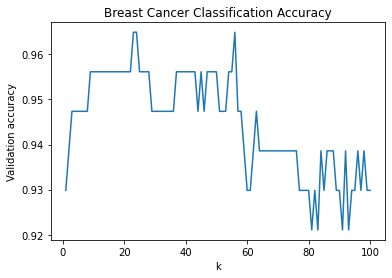

In [30]:
#Lets plot out our accuracies
import matplotlib.pyplot as plt

k_list = range(1,101)

plt.plot(k_list,accuracies)
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.title('Breast Cancer Classification Accuracy')
plt.show()